## Lesson 3. Classification: Credit worthiness from German bank

#### Student: Rodolfo Lerma

<img src="https://upload.wikimedia.org/wikipedia/commons/8/8e/Flag_map_of_Germany.svg" style="height:200px;">
  
  <p>In this exercise you will predict credit worthiness of custmers of a German bank (<a href="https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)">provided by Hans Hofmann from Univeristy of Hamburg</a>). The data we will be working with here is a reduced version of the full dataset.</p>
<p>The following features are available for the 1000-row dataset:</p>
<ul>
<li>Class: Credit worthiness (what you are trying to predict)</li>
<li>Duration: Duration of the credit (in months) </li>
<li>Amount: Amount of money asked for (in Deutche Marks (DM))</li>
<li>InstallmentRatePercentage: Installment rate in percentage of disposable income </li>
<li>ResidenceDuration: Number of years at current residence</li>
<li>Age: Person's age</li>
<li>NumberExistingCredits: Number of credit accounts</li>
<li>NumberPeopleMaintenance: Number of people being liable to provide maintenance for the credit</li>
<li>Telephone: Is there a phone number associated with the customer name?  </li>
<li>ForeignWorker: Is the person a foreign worker?</li>
<li>CheckingAccountStatus: Amount of money in the checking account (in DM)<ul>
<li>CheckingAccountStatus.lt.0</li>
<li>CheckingAccountStatus.0.to.200</li>
<li>CheckingAccountStatus.gt.200</li>
</ul></li>
<li>CreditHistory: Past credit history<ul>
<li>CreditHistory.ThisBank.AllPaid</li>
<li>CreditHistory.PaidDuly</li>
<li>CreditHistory.Delay</li>
<li>CreditHistory.Critical</li>
</ul></li>
</ul>

<p>This dataset is available in <a href="http://caret.r-forge.r-project.org/">'caret'</a> library. Let's load it and see how it looks:</p>

In [1]:
import pandas as pd
import numpy as np

# loading the training and test dataset
credit_train = pd.read_csv('credit_train.csv')
credit_test = pd.read_csv('credit_test.csv')

## Exploring the train and test data set

### Train Data Set

In [2]:
credit_train.head()

,Class,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,CheckingAccountStatus.lt.0,CheckingAccountStatus.0.to.200,CheckingAccountStatus.gt.200,CreditHistory.ThisBank.AllPaid,CreditHistory.PaidDuly,CreditHistory.Delay,CreditHistory.Critical
0,Good,6,1169,4,4,67,2,1,0,1,1,0,0,0,0,0,1
1,Bad,48,5951,2,2,22,1,1,1,1,0,1,0,0,1,0,0
2,Good,12,2096,2,3,49,1,2,1,1,0,0,0,0,0,0,1
3,Good,36,9055,2,4,35,1,2,0,1,0,0,0,0,1,0,0
4,Good,24,2835,3,4,53,1,1,1,1,0,0,0,0,1,0,0


In [3]:
credit_train.shape

(808, 17)

In [4]:
credit_train.dtypes

Class                             object
Duration                           int64
Amount                             int64
InstallmentRatePercentage          int64
ResidenceDuration                  int64
Age                                int64
NumberExistingCredits              int64
NumberPeopleMaintenance            int64
Telephone                          int64
ForeignWorker                      int64
CheckingAccountStatus.lt.0         int64
CheckingAccountStatus.0.to.200     int64
CheckingAccountStatus.gt.200       int64
CreditHistory.ThisBank.AllPaid     int64
CreditHistory.PaidDuly             int64
CreditHistory.Delay                int64
CreditHistory.Critical             int64
dtype: object

### Test Data Set

In [5]:
credit_test.head()

,Class,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,CheckingAccountStatus.lt.0,CheckingAccountStatus.0.to.200,CheckingAccountStatus.gt.200,CreditHistory.ThisBank.AllPaid,CreditHistory.PaidDuly,CreditHistory.Delay,CreditHistory.Critical
0,Good,42,7882,2,4,45,1,2,1,1,1,0,0,0,1,0,0
1,Bad,24,4870,3,4,53,2,2,1,1,1,0,0,0,0,1,0
2,Good,36,6948,2,2,35,1,1,0,1,0,1,0,0,1,0,0
3,Bad,12,1295,3,1,25,1,1,1,1,0,1,0,0,1,0,0
4,Bad,24,1282,4,2,32,1,1,1,1,1,0,0,0,1,0,0


In [6]:
credit_test.shape

(192, 17)

In [7]:
credit_test.dtypes

Class                             object
Duration                           int64
Amount                             int64
InstallmentRatePercentage          int64
ResidenceDuration                  int64
Age                                int64
NumberExistingCredits              int64
NumberPeopleMaintenance            int64
Telephone                          int64
ForeignWorker                      int64
CheckingAccountStatus.lt.0         int64
CheckingAccountStatus.0.to.200     int64
CheckingAccountStatus.gt.200       int64
CreditHistory.ThisBank.AllPaid     int64
CreditHistory.PaidDuly             int64
CreditHistory.Delay                int64
CreditHistory.Critical             int64
dtype: object

<h3>Q.0. Write code to display the count of null values in each column<h3>

In [8]:
print('Train Data')
credit_train.isna().sum()

Train Data


Class                             0
Duration                          0
Amount                            0
InstallmentRatePercentage         0
ResidenceDuration                 0
Age                               0
NumberExistingCredits             0
NumberPeopleMaintenance           0
Telephone                         0
ForeignWorker                     0
CheckingAccountStatus.lt.0        0
CheckingAccountStatus.0.to.200    0
CheckingAccountStatus.gt.200      0
CreditHistory.ThisBank.AllPaid    0
CreditHistory.PaidDuly            0
CreditHistory.Delay               0
CreditHistory.Critical            0
dtype: int64

In [9]:
print('Test Data')
credit_test.isna().sum()

Test Data


Class                             0
Duration                          0
Amount                            0
InstallmentRatePercentage         0
ResidenceDuration                 0
Age                               0
NumberExistingCredits             0
NumberPeopleMaintenance           0
Telephone                         0
ForeignWorker                     0
CheckingAccountStatus.lt.0        0
CheckingAccountStatus.0.to.200    0
CheckingAccountStatus.gt.200      0
CreditHistory.ThisBank.AllPaid    0
CreditHistory.PaidDuly            0
CreditHistory.Delay               0
CreditHistory.Critical            0
dtype: int64

Based on the code above we can see that the data set contain 17 columns and 808 observations. Just one of the noted 17 columns is a type object, the rest are consider integers. 

It seems there is no null/missing values in the `credit_train` data set.

<h3>Q.1. How does the distribution of credit amount look like? (Use a histogram plot to answer this question)</h3>

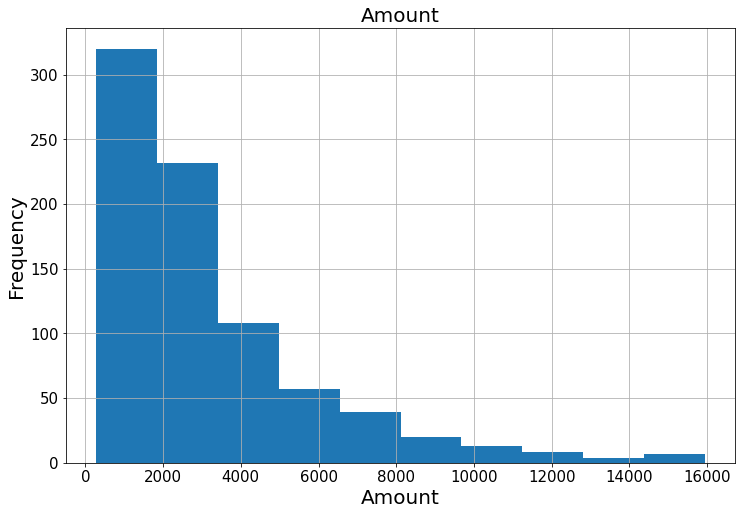

In [10]:
# Put the command (or commands) here that would give an answer to the above question.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def histogram_plot(a,b):
    a[b].hist(figsize = (12,8))
    plt.xlabel(b, fontsize = 20)
    plt.ylabel('Frequency',fontsize = 20)
    plt.title(b, fontsize = 20)
    plt.tick_params(axis="x", labelsize=15)
    plt.tick_params(axis="y", labelsize=15)
    plt.grid(True)
    plt.show()

histogram_plot(credit_train, 'Amount')

One sentence summary:

It does not look like a normal distribution, but as a skewed distribution to the right. One can say that it may look like a Log Normal Distribution.

<h3>Q.2. Can you generate a plot that shows CreditHistory.Critical vs. Credit Worthiness for the training data. Can you comment whether person with critical credit history is more credit worthy?</h3> 

In [11]:
# Command:
def scatter_plot(a,b,c):
    ax = plt.figure(figsize=(6, 4)).gca() # define axis
    a.plot.scatter(x = b, y = c, ax = ax)
    ax.set_title(b + ' Vs ' + c, fontsize = 25) # Give the plot a main title
    ax.set_ylabel(c, fontsize = 20)# Set text for y axis
    ax.set_xlabel(b, fontsize = 20)
    ax.tick_params(axis="x", labelsize=20)
    ax.tick_params(axis="y", labelsize=20)
    ax.grid(True)
    plt.show()

[Text(0.5, 1.0, 'Critical Histogram split by "Class"')]

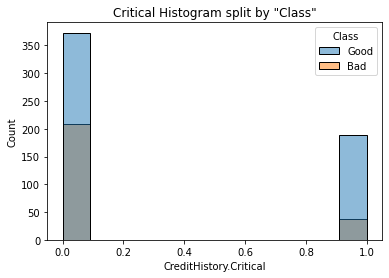

In [12]:
sns.histplot(data=credit_train, x="CreditHistory.Critical", hue="Class").set(title='Critical Histogram split by "Class"')

One sentence summary:

<h3>Q.3. Binarize the y output for e.g. 0 = 'bad' credit; 1 = 'good' credit. </h3>

In [13]:
credit_train.replace(to_replace = ['Good','Bad'], value = ['1','0'], inplace = True)
credit_test.replace(to_replace = ['Good','Bad'], value = ['1','0'], inplace = True)
credit_train.head()

,Class,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,CheckingAccountStatus.lt.0,CheckingAccountStatus.0.to.200,CheckingAccountStatus.gt.200,CreditHistory.ThisBank.AllPaid,CreditHistory.PaidDuly,CreditHistory.Delay,CreditHistory.Critical
0,1,6,1169,4,4,67,2,1,0,1,1,0,0,0,0,0,1
1,0,48,5951,2,2,22,1,1,1,1,0,1,0,0,1,0,0
2,1,12,2096,2,3,49,1,2,1,1,0,0,0,0,0,0,1
3,1,36,9055,2,4,35,1,2,0,1,0,0,0,0,1,0,0
4,1,24,2835,3,4,53,1,1,1,1,0,0,0,0,1,0,0


In [14]:
# #Correlation plots for all the numerical features
# columns = credit_train.columns.tolist()
# correlations = credit_train.corr()
# fig = plt.figure(figsize = (12,12))
# ax = fig.add_subplot(111)
# cax = ax.matshow(correlations, vmin=-1, vmax=1)
# fig.colorbar(cax)
# ticks = np.arange(0,16,1)
# ax.set_xticks(ticks)
# ax.set_yticks(ticks)
# ax.set_xticklabels(columns, fontsize = 15)
# ax.set_yticklabels(columns, fontsize = 15)
# plt.show()

<h3>Q.4. Generate a logistic regression model that uses the one predictor CreditHistory.Critical. Provide a summary of the model. </h3>

In [15]:
#import sklearn.linear_model as skl_lm
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

In [16]:
# #Dropping the 2 categorical variables
X = credit_train["CreditHistory.Critical"].to_numpy()
y = credit_train["Class"].to_numpy()

X_t = credit_test["CreditHistory.Critical"].to_numpy()
y_t = credit_test["Class"].to_numpy()

log_reg_sk = LogisticRegression()
log_reg_sk.fit(X.reshape(-1,1), y)

LogisticRegression()

In [17]:
X_train = credit_train[["CreditHistory.Critical"]].astype(float)
y_train = credit_train[["Class"]].astype(float)

In [18]:
log_reg = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.625326
         Iterations 5


In [19]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                  808
Model:                          Logit   Df Residuals:                      807
Method:                           MLE   Df Model:                            0
Date:                Sat, 23 Oct 2021   Pseudo R-squ.:                -0.01747
Time:                        09:05:11   Log-Likelihood:                -505.26
converged:                       True   LL-Null:                       -496.59
Covariance Type:            nonrobust   LLR p-value:                       nan
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
CreditHistory.Critical     1.6042      0.178      9.023      0.000       1.256       1.953


<h3>Q.5. Using the developed model, predict the values in credit_test and use it to output a confusion matrix.</h3>

In [20]:
X_test = credit_test[["CreditHistory.Critical"]].astype(float)
y_test = credit_test[["Class"]].astype(float)

y_predicted = log_reg.predict(X_test)
prediction = list(map(round, y_predicted))

Text(0.5, 15.0, 'Predicted label')

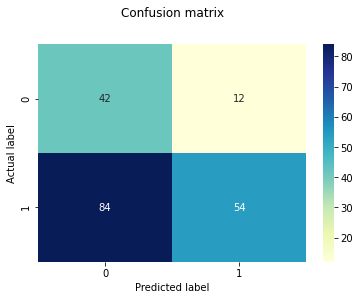

In [21]:
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score)
import seaborn as sns

#Confusion matrix
cm = confusion_matrix(y_test, prediction)
#print ("Confusion Matrix : \n", cm)

class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
#ax.xaxis.set_label_position("top")
#plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

<h3>Q.6. What is the accuracy of the model on the test data?</h3>

In [22]:
#Accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test, prediction))
print('Test recall = ', recall_score(y_test, prediction))
print('Test precision = ', precision_score(y_test, prediction))

Test accuracy =  0.5
Test recall =  0.391304347826087
Test precision =  0.8181818181818182


<h3>Q.7. Generate the ROC curve.</h3>

In [23]:
# from sklearn.metrics import roc_curve
# from sklearn.metrics import roc_auc_score

# prediction_prob = model.log_reg(X_test)

# ns_auc = roc_auc_score(y_test, ns_probs)
# lr_auc = roc_auc_score(y_test, prediction_prob)

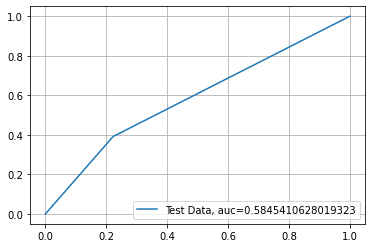

In [24]:
import scikitplot as skplt
from sklearn import metrics

prediction_prob = log_reg_sk.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  prediction_prob)
auc = metrics.roc_auc_score(y_test, prediction_prob)

plt.plot(fpr,tpr,label="Test Data, auc="+str(auc))
plt.legend(loc=4)
plt.grid()
plt.show()

<h3>Q.8. What is the ROC AUC of the model on the test data?</h3>

In [25]:
print('The ROC AUC is = ', auc)

The ROC AUC is =  0.5845410628019323


<h3>Q.9. Calculate LDA model on credit_train.</h3>

In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X.reshape(-1,1), y)

y_predicted_lda = lda.predict(X_t.reshape(-1,1))

# y_predicted = log_reg.predict(X_test)
# prediction = list(map(round, y_predicted))

In [27]:
lda.priors_

array([0.30445545, 0.69554455])

In [28]:
lda.means_

array([[0.15447154],
       [0.33629893]])

In [29]:
lda.coef_

array([[0.93008353]])

In [30]:
confusion_matrix(y_t, y_predicted_lda).T

array([[  0,   0],
       [ 54, 138]], dtype=int64)

<h3>Q.10. What is the accuracy of the new model?</h3>

In [31]:
print('Test accuracy = ', accuracy_score(y_t, y_predicted_lda))

Test accuracy =  0.71875


<h3>Q.11. Create a new text cell in your Notebook: Complete a 50-100 word summary 
    (or short description of your thinking in applying this week's learning to the solution) 
     of your experience in this assignment. Include:
<br>                                                                       
What was your incoming experience with this model, if any?
what steps you took, what obstacles you encountered.
how you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?)
This summary allows your instructor to know how you are doing and allot points for your effort in thinking and planning, and making connections to real-world work.
</h3>